<a href="https://colab.research.google.com/github/md-ali2001/recognizing-images-using-ML/blob/main/malaria_(_parasited_uninfected_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/MyDrive/ALI')

In [ ]:
classes = ['parasitized','uninfected']

In [ ]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=4)

parasitized
uninfected


In [ ]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=64, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  re

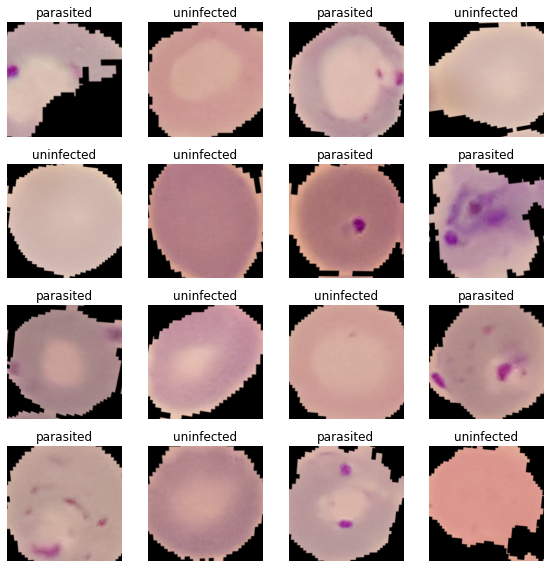

In [ ]:
data.show_batch(rows=4 , figsize=(8,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])
# 1 - accuracy ----> error rate

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.107403,0.275215,0.896552,00:08
1,0.692568,0.319791,0.873563,00:05
2,0.548746,0.312397,0.919540,00:05
3,0.429278,0.292028,0.919540,00:05
4,0.354707,0.196348,0.931035,00:05


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


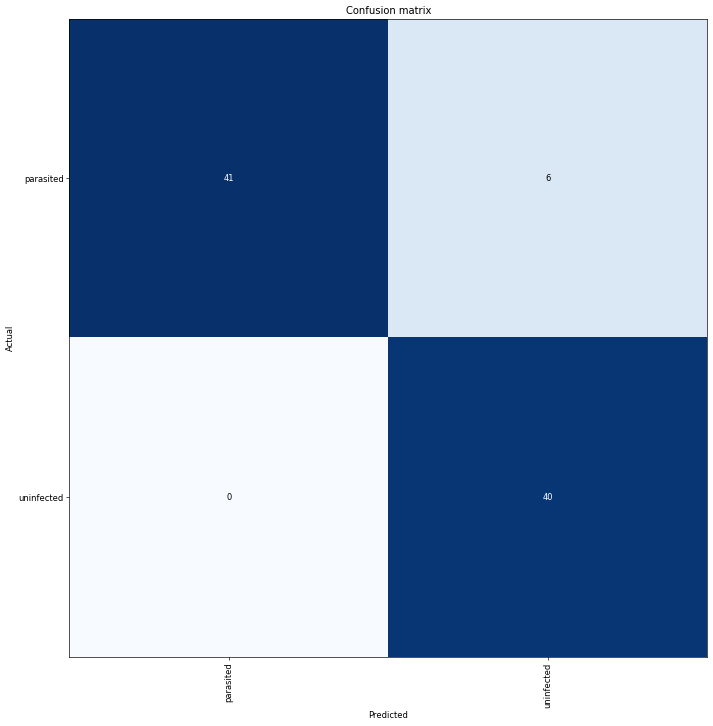

In [ ]:
# Build a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Save the model
learn.save('stage-2')

In [ ]:
learn.export()

In [ ]:
learn = load_learner(path)

In [ ]:
img = open_image('')
img

FileNotFoundError: ignored

In [ ]:
pred_class,_,probs = learn.predict(img)
print(pred_class)
print(f"The probability rate is : {probs[1].item():.6f}")